<a href="https://colab.research.google.com/github/arsyafathia/arsyafathia/blob/main/gaussian%20naive%20bayes%20(cross%20val).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB


In [ ]:
#import data dan mengubah ke csv
import pandas as pd
read_file = pd.read_excel ("datasetbaru.xlsx")
read_file.to_csv ("dataset.csv", index = None,header=True)
df =pd.DataFrame(pd.read_csv("dataset.csv"))
df

,kota,kecamatan,kelurahan,ph,deterjen,mangan,total_coliform,e_coli,indeks,mutu
0,Jakarta Pusat,Gambir,Cideng,7.2,0.60,0.30,100,100,1.78,Cemar Ringan
1,Jakarta Pusat,Gambir,Duri Pulo,7.6,2.94,1.51,0,0,0.72,Baik
2,Jakarta Pusat,Gambir,Gambir,7.9,0.14,0.60,100,0,2.74,Cemar Ringan
3,Jakarta Pusat,Gambir,Kebon Kelapa,7.5,0.60,0.30,0,0,0.99,Baik
4,Jakarta Pusat,Gambir,Petojo Selatan,7.7,0.60,0.30,0,0,1.31,Cemar Ringan
...,...,...,...,...,...,...,...,...,...,...
1063,Jakarta Timur,Cipayung,Cipayung,7.0,0.02,0.03,2900,0,6.00,Cemar Sedang
1064,Jakarta Timur,Cipayung,Lubang Buaya,6.5,0.02,0.03,1000,600,5.00,Cemar Sedang
1065,Jakarta Timur,Cipayung,Munjul,6.0,0.02,0.03,900,200,5.00,Cemar Sedang
1066,Jakarta Timur,Cipayung,Pondok Ranggon,6.6,0.02,0.03,0,0,0.00,Baik


In [ ]:
#mencari data yang kosong
df.isnull().sum()

kota              0
kecamatan         0
kelurahan         0
ph                0
deterjen          0
mangan            0
total_coliform    0
e_coli            0
indeks            0
mutu              0
dtype: int64

In [ ]:
df['mutu'].value_counts()

Cemar Ringan    519
Baik            277
Cemar Sedang    233
Cemar Berat      39
Name: mutu, dtype: int64

In [ ]:
#mencari duplikat data
duplicate_rows = df[df.duplicated()]

# menampilkan rows duplikat
print(duplicate_rows)

Empty DataFrame
Columns: [kota, kecamatan, kelurahan, ph, deterjen, mangan, total_coliform, e_coli, indeks, mutu]
Index: []


In [ ]:
#menghitung jumlah data berdasarkan kelurahan dan kecamatan
kota_filter = ['Jakarta Timur', 'Jakarta Barat', 'Jakarta Utara',
               'Jakarta Selatan', 'Jakarta Pusat']
df_filtered = df[df['kota'].isin(kota_filter)]

# Hitung jumlah kelurahan unik di keempat kota tersebut
jumlah_kelurahan = df_filtered['kelurahan'].nunique()
jumlah_kecamatan = df_filtered['kecamatan'].nunique()

print("Jumlah Kelurahan di Jakarta:", jumlah_kelurahan)
print("Jumlah Kecamatan di Jakarta:", jumlah_kecamatan)

jumlah_data = df_filtered.shape[0]
print("Jumlah Keseluruhan Data:", jumlah_data)

Jumlah Kelurahan di Jakarta: 267
Jumlah Kecamatan di Jakarta: 44
Jumlah Keseluruhan Data: 1068


In [ ]:
X = df.drop('mutu', axis=1)
y = df['mutu']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   kota            1068 non-null   object 
 1   kecamatan       1068 non-null   object 
 2   kelurahan       1068 non-null   object 
 3   ph              1068 non-null   float64
 4   deterjen        1068 non-null   float64
 5   mangan          1068 non-null   float64
 6   total_coliform  1068 non-null   int64  
 7   e_coli          1068 non-null   int64  
 8   indeks          1068 non-null   float64
 9   mutu            1068 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 83.6+ KB


In [ ]:
print(X.info())
print(X.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   kota            1068 non-null   object 
 1   kecamatan       1068 non-null   object 
 2   kelurahan       1068 non-null   object 
 3   ph              1068 non-null   float64
 4   deterjen        1068 non-null   float64
 5   mangan          1068 non-null   float64
 6   total_coliform  1068 non-null   int64  
 7   e_coli          1068 non-null   int64  
 8   indeks          1068 non-null   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 75.2+ KB
None
                ph     deterjen       mangan  total_coliform        e_coli  \
count  1068.000000  1068.000000  1068.000000    1.068000e+03  1.068000e+03   
mean      7.006695     0.164596     0.353956    5.896732e+04  9.423071e+03   
std       0.545592     0.276354     1.038761    1.010805e+06  2.055510e+05   
min       4.100000 

In [ ]:
print(X.columns)

Index(['kota', 'kecamatan', 'kelurahan', 'ph', 'deterjen', 'mangan',
       'total_coliform', 'e_coli', 'indeks'],
      dtype='object')


In [ ]:
#normalisasi
from sklearn.preprocessing import MinMaxScaler
# Atribut numerik
numeric_cols = ['ph', 'deterjen', 'mangan',
                'total_coliform', 'e_coli', 'indeks']
# Atribut string
categorical_cols = ['kota','kecamatan',
                    'kelurahan','mutu']
scaler = MinMaxScaler()
df[numeric_cols]= scaler.fit_transform(df[numeric_cols])
df

,kota,kecamatan,kelurahan,ph,deterjen,mangan,total_coliform,e_coli,indeks,mutu
0,Jakarta Pusat,Gambir,Cideng,0.534483,0.117647,0.012500,0.000003,0.000017,0.043309,Cemar Ringan
1,Jakarta Pusat,Gambir,Duri Pulo,0.603448,0.576471,0.062917,0.000000,0.000000,0.017518,Baik
2,Jakarta Pusat,Gambir,Gambir,0.655172,0.027451,0.025000,0.000003,0.000000,0.066667,Cemar Ringan
3,Jakarta Pusat,Gambir,Kebon Kelapa,0.586207,0.117647,0.012500,0.000000,0.000000,0.024088,Baik
4,Jakarta Pusat,Gambir,Petojo Selatan,0.620690,0.117647,0.012500,0.000000,0.000000,0.031873,Cemar Ringan
...,...,...,...,...,...,...,...,...,...,...
1063,Jakarta Timur,Cipayung,Cipayung,0.500000,0.003922,0.001250,0.000100,0.000000,0.145985,Cemar Sedang
1064,Jakarta Timur,Cipayung,Lubang Buaya,0.413793,0.003922,0.001250,0.000034,0.000100,0.121655,Cemar Sedang
1065,Jakarta Timur,Cipayung,Munjul,0.327586,0.003922,0.001250,0.000031,0.000033,0.121655,Cemar Sedang
1066,Jakarta Timur,Cipayung,Pondok Ranggon,0.431034,0.003922,0.001250,0.000000,0.000000,0.000000,Baik


In [ ]:
#modelling
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict

# Inisialisasi model Naive Bayes
model = GaussianNB()

n_folds = 5 # Jumlah fold yang diinginkan
kf = KFold(n_splits=n_folds, shuffle=False)

# Menggunakan cross_val_predict untuk melakukan prediksi pada setiap fold
y_pred = cross_val_predict(model, df[numeric_cols], y, cv=kf)


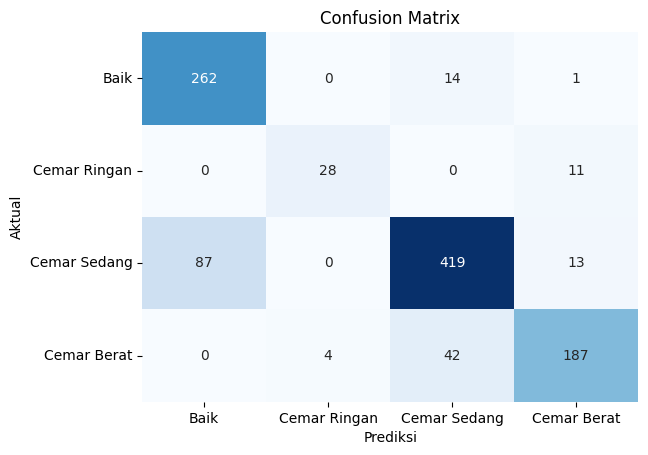

In [ ]:
#menampilkan confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)
class_names = ["Baik", "Cemar Ringan", "Cemar Sedang", "Cemar Berat"]
# Visualisasi confusion matrix menggunakan heatmap
sns.heatmap(cm, annot=True, fmt="d",cmap="Blues", cbar=False,
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Menghitung accuracy dan error rate
correct_instances = (y == y_pred).sum()
incorrect_instances = len(y) - correct_instances

total_instances = len(y)
correct_percentage = (correct_instances / total_instances) * 100
incorrect_percentage = (incorrect_instances / total_instances) * 100

# Menampilkan hasil
print(f"Accuracy  : ({correct_percentage:.4f}%)")
print(f"Error Rate: ({incorrect_percentage:.4f}%)")

Accuracy  : (83.8951%)
Error Rate: (16.1049%)


In [ ]:
#precision, recall, f1-score keseluruhan
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
f1_score = f1_score(y, y_pred, average='weighted')
# Menampilkan hasil
print("Presisi (Precision): {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-Score: {:.4f}".format(f1_score))

Presisi (Precision): 0.8478
Recall: 0.8390
F1-Score: 0.8389


In [ ]:
#precision, recall, f1-score pada tiap label
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

labels = ['Baik', 'Cemar Ringan', 'Cemar Sedang', 'Cemar Berat']
tp = np.diag(cm)
fn = np.sum(cm, axis=1) - tp
fp = np.sum(cm, axis=0) - tp

# Menghitung precision, recall, dan F1-score untuk setiap kelas
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

# Menyimpan hasil pada dictionary untuk tiap label
result = {}
for i in range(len(labels)):
    label = labels[i]
    result[label] = {'precision': precision[i],
                     'recall': recall[i],
                     'f1_score': f1_score[i]}

# Menampilkan hasil dengan hanya 4 angka di belakang koma
for label, metrics in result.items():
    precision = round(metrics['precision'], 5)
    recall = round(metrics['recall'], 5)
    f1_score = round(metrics['f1_score'], 5)
    print("Label: {:<20}  Precision: {:.5f}".format(label, precision), end='  ')
    print("Recall: {:.5f}".format(recall), end='  ')
    print("F1-score: {:.5f}".format(f1_score))


Label: Baik                  Precision: 0.75072  Recall: 0.94585  F1-score: 0.83706
Label: Cemar Ringan          Precision: 0.87500  Recall: 0.71795  F1-score: 0.78873
Label: Cemar Sedang          Precision: 0.88211  Recall: 0.80732  F1-score: 0.84306
Label: Cemar Berat           Precision: 0.88208  Recall: 0.80258  F1-score: 0.84045
